# Linear Regression

This notebook contains the Programming Exercise 1 of the Andrew Ng's course on Coursera.

## Linear Regression with one variable
In this first part we are asked to implement 'Linear regression with one variable' to predict profits of a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/eduard/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/eduard/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
# load data
import os
data = pd.read_csv(os.getcwd() + '/ex1data1.txt', header=None, names=['Population', 'Profit'])

In [9]:
# explore data
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Both Population and Profit have a multiplying factor of 10.000

KeyError: 'Population in 10.000s'

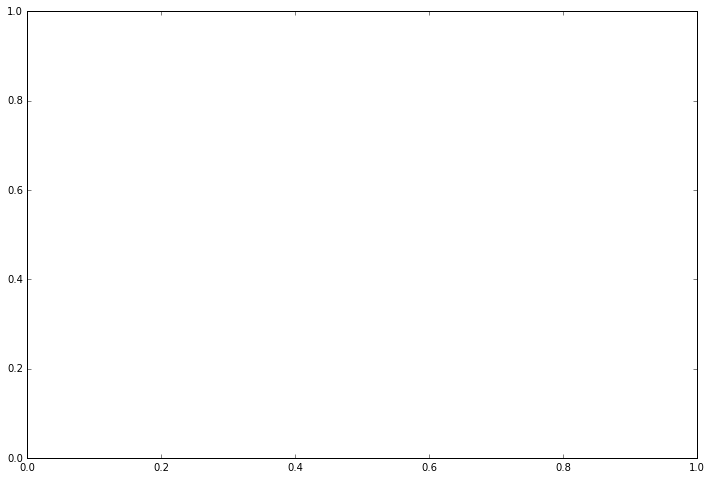

In [10]:
# scatter plot of the data (using plot function from pandas)
data.plot(kind='scatter', x='Population in 10.000s', y='Profit in $10.000s', figsize=(12,8))